In [1]:
suppressMessages(library("dplyr"))    # 1.1.2

Warning message:
"package 'dplyr' was built under R version 4.2.3"


In [2]:
#read in apa results provided by Gregor Roth using the apa analysis pipeline at https://www.expressrna.org/

u1c     = read.csv("results_apa_amirR-u1c.csv",     row.names = 1)
u170k   = read.csv("results_apa_amirR-u170k.csv",   row.names = 1)

In [3]:
#get all overlapping events
all_events = merge(u1c, u170k, by = c(1,2,3,4,5,6,7,8,10,12,14), all = TRUE)

#check individual events for enhanced/repressed
enhanced_u1c = nrow(u170k %>% filter(gene_class == "enhanced"))
print(paste0("The number of enhanced PAS in u1c is ", enhanced_u1c))

repressed_u1c = nrow(u1c %>% filter(gene_class == "repressed"))
print(paste0("The number of repressed PAS in u1c is ", repressed_u1c))

enhanced_u170k = nrow(u170k %>% filter(gene_class == "enhanced"))
print(paste0("The number of enhanced PAS in u170k is ", enhanced_u170k))

repressed_u170k = nrow(u170k %>% filter(gene_class == "repressed"))
print(paste0("The number of repressed PAS in u170k is ", repressed_u170k))


#get the overlap
overlap_enhanced    = merge(u1c %>% filter(gene_class == "enhanced"),   u170k %>% filter(gene_class == "enhanced"),     by = c(1,2,3,4,5,6,8,9,10,12,14,35), suffixes = c("_u1c", "_u170k"))
overlap_repressed   = merge(u1c %>% filter(gene_class == "repressed"),  u170k %>% filter(gene_class == "repressed"),    by = c(1,2,3,4,5,6,8,9,10,12,14,35), suffixes = c("_u1c", "_u170k"))

print(paste0("The overlap of enhanced PAS between u1c and u170k is ",   nrow(overlap_enhanced)))
print(paste0("The overlap of repressed PAS between u1c and u170k is ",  nrow(overlap_repressed)))


#define every type by genotype, eventtype and direction of change
u1c_enhanced_composite      = u1c %>% filter(pair_type == "composite"       & gene_class == "enhanced")
u1c_enhanced_same           = u1c %>% filter(pair_type == "same"            & gene_class == "enhanced")
u1c_enhanced_skipped        = u1c %>% filter(pair_type == "skipped"         & gene_class == "enhanced")
u1c_repressed_composite     = u1c %>% filter(pair_type == "composite"       & gene_class == "repressed")
u1c_repressed_same          = u1c %>% filter(pair_type == "same"            & gene_class == "repressed")
u1c_repressed_skipped       = u1c %>% filter(pair_type == "skipped"         & gene_class == "repressed")


u170k_enhanced_composite    = u170k %>% filter(pair_type == "composite"     & gene_class == "enhanced")
u170k_enhanced_same         = u170k %>% filter(pair_type == "same"          & gene_class == "enhanced")
u170k_enhanced_skipped      = u170k %>% filter(pair_type == "skipped"       & gene_class == "enhanced")
u170k_repressed_composite   = u170k %>% filter(pair_type == "composite"     & gene_class == "repressed")
u170k_repressed_same        = u170k %>% filter(pair_type == "same"          & gene_class == "repressed")
u170k_repressed_skipped     = u170k %>% filter(pair_type == "skipped"       & gene_class == "repressed")


print(paste0("The number of enhanced composite PAS in u1c is ",     nrow(u1c_enhanced_composite)))
print(paste0("The number of repressed composite PAS in u1c is ",    nrow(u1c_repressed_composite)))

print(paste0("The number of enhanced composite PAS in u170k is ",   nrow(u170k_enhanced_composite)))
print(paste0("The number of repressed composite PAS in u170k is ",  nrow(u170k_repressed_composite)))


[1] "The number of enhanced PAS in u1c is 467"
[1] "The number of repressed PAS in u1c is 693"
[1] "The number of enhanced PAS in u170k is 467"
[1] "The number of repressed PAS in u170k is 484"
[1] "The overlap of enhanced PAS between u1c and u170k is 176"
[1] "The overlap of repressed PAS between u1c and u170k is 102"
[1] "The number of enhanced composite PAS in u1c is 10"
[1] "The number of repressed composite PAS in u1c is 93"
[1] "The number of enhanced composite PAS in u170k is 18"
[1] "The number of repressed composite PAS in u170k is 279"


In [5]:
#get the overlaps
#this is a pretty restrictive merging. The both polyA sites need to be at the exact same position
ski_rep     = merge(u1c %>% filter(pair_type == "skipped"   & gene_class == "repressed"),    u170k %>% filter(pair_type == "skipped"   & gene_class == "repressed"), by = c(1,2,3,4,5,6,8,9,10,12,14,34,35), suffixes = c("_u1c", "_u170k"))
same_rep    = merge(u1c %>% filter(pair_type == "same"      & gene_class == "repressed"),    u170k %>% filter(pair_type == "same"      & gene_class == "repressed"), by = c(1,2,3,4,5,6,8,9,10,12,14,34,35), suffixes = c("_u1c", "_u170k"))
comp_rep    = merge(u1c %>% filter(pair_type == "composite" & gene_class == "repressed"),    u170k %>% filter(pair_type == "composite" & gene_class == "repressed"), by = c(1,2,3,4,5,6,8,9,10,12,14,34,35), suffixes = c("_u1c", "_u170k"))
ski_enh     = merge(u1c %>% filter(pair_type == "skipped"   & gene_class == "enhanced"),     u170k %>% filter(pair_type == "skipped"   & gene_class == "enhanced"),  by = c(1,2,3,4,5,6,8,9,10,12,14,34,35), suffixes = c("_u1c", "_u170k"))
same_enh    = merge(u1c %>% filter(pair_type == "same"      & gene_class == "enhanced"),     u170k %>% filter(pair_type == "same"      & gene_class == "enhanced"),  by = c(1,2,3,4,5,6,8,9,10,12,14,34,35), suffixes = c("_u1c", "_u170k"))
comp_enh    = merge(u1c %>% filter(pair_type == "composite" & gene_class == "enhanced"),     u170k %>% filter(pair_type == "composite" & gene_class == "enhanced"),  by = c(1,2,3,4,5,6,8,9,10,12,14,34,35), suffixes = c("_u1c", "_u170k"))

In [6]:
#get number of comp_rep events
nrow(comp_rep)

[1] 38

In [7]:
#write output tables
write.table(x = same_enh,   "overlap_apa_enhanced_same_exon",        row.names = F, col.names = F, quote = F)
write.table(x = ski_enh,    "overlap_apa_enhanced_skipped_exon",     row.names = F, col.names = F, quote = F)
write.table(x = comp_enh,   "overlap_apa_enhanced_composite_exon",   row.names = F, col.names = F, quote = F)
write.table(x = same_rep,   "overlap_apa_repressed_same_exon",       row.names = F, col.names = F, quote = F)
write.table(x = ski_rep,    "overlap_apa_repressed_skipped_exon",    row.names = F, col.names = F, quote = F)
write.table(x = comp_rep,   "overlap_apa_repressed_composite_exon",  row.names = F, col.names = F, quote = F)

In [7]:
#test for significant over-representation in overlap of enhanced PAS
phyper(nrow(overlap_enhanced)-1, enhanced_u1c, nrow(all_events)-enhanced_u1c, enhanced_u170k, lower.tail = FALSE)

[1] 1.458394e-73

In [8]:
#test for significant over-representation in overlap of repressed PAS
phyper(nrow(overlap_repressed)-1, repressed_u1c, nrow(all_events)-repressed_u1c, repressed_u170k, lower.tail = FALSE)

[1] 1.237018e-06

In [9]:
#test for significant over-representation in overlap of repressed composite PAS
phyper(nrow(comp_rep)-1, nrow(u1c_repressed_composite), nrow(all_events)-nrow(u1c_repressed_composite), nrow(u170k_repressed_composite), lower.tail = FALSE)

[1] 1.188339e-24

In [10]:
#test for significant over-representation in overlap of enhanced composite PAS
phyper(nrow(comp_enh)-1, nrow(u1c_enhanced_composite), nrow(all_events)-nrow(u1c_enhanced_composite), nrow(u170k_enhanced_composite), lower.tail = FALSE)

[1] 7.481098e-11

###3. Analysis for revision

3.1 Make bed files to search for denovo and known motifs around the pA sites and unrelated introns at the same relative position as the polyA-Sites

In [4]:
#filter proximal repressed composite sites
u1c_proximal_pa_repressed_composite     = u1c_repressed_composite   %>% select(chr, proximal_pos, distal_pos, gene_id, gene_class, strand) 
u170k_proximal_pa_repressed_composite   = u170k_repressed_composite %>% select(chr, proximal_pos, distal_pos, gene_id, gene_class, strand) 

In [5]:
#The way my workflow works currently, is that i need an interval of at least length 2 in my bedfile. So i extend the proximal position by 1 downstream.
#u170k

bed_proximal_sites_u170k_pos = u170k_proximal_pa_repressed_composite    %>% 
    filter(strand == "+")                                               %>%
    group_by(gene_id)                                                   %>%

    #here i make sure i dont take several pAs from the same gene but take the most proximal one
    slice_min(order_by = proximal_pos, n = 1)                           %>%

    #gene class is just a place holder
    select(chr, proximal_pos, distal_pos, gene_id, gene_class, strand)  %>%
    mutate(distal_pos = proximal_pos+1, gene_class = ".")


bed_proximal_sites_u170k_neg = u170k_proximal_pa_repressed_composite    %>% 
    filter(strand == "-")                                               %>%
    group_by(gene_id)                                                   %>%  

    #here i make sure i dont take several pAs from the same gene but take the most proximal one
    slice_max(order_by = proximal_pos, n = 1)                           %>%

    #gene class is just a place holder
    select(chr, distal_pos, proximal_pos, gene_id, gene_class, strand)  %>%
    mutate(distal_pos = proximal_pos-1, gene_class = ".")

colnames(bed_proximal_sites_u170k_neg) = colnames(bed_proximal_sites_u170k_pos)
bed_proximal_sites_u170k = rbind(bed_proximal_sites_u170k_neg, bed_proximal_sites_u170k_pos)

In [6]:
#u1c. I look at both individually because the overlap is too small for me to realisticly see anything

bed_proximal_sites_u1c_pos = u1c_proximal_pa_repressed_composite        %>% 
    filter(strand == "+")                                               %>%
    group_by(gene_id)                                                   %>%

    #here i make sure i dont take several pAs from the same gene but take the most proximal one
    slice_min(order_by = proximal_pos, n = 1)                           %>%

    #gene class is just a place holder
    select(chr, proximal_pos, distal_pos, gene_id, gene_class, strand)  %>%
    mutate(distal_pos = proximal_pos+1, gene_class = ".")


bed_proximal_sites_u1c_neg = u1c_proximal_pa_repressed_composite        %>% 
    filter(strand == "-")                                               %>%
    group_by(gene_id)                                                   %>%  

    #here i make sure i dont take several pAs from the same gene but take the most proximal one
    slice_max(order_by = proximal_pos, n = 1)                           %>%

    #gene class is just a place holder
    select(chr, distal_pos, proximal_pos, gene_id, gene_class, strand)  %>%
    mutate(distal_pos = proximal_pos-1, gene_class = ".")

colnames(bed_proximal_sites_u1c_neg) = colnames(bed_proximal_sites_u1c_pos)
bed_proximal_sites_u1c = rbind(bed_proximal_sites_u1c_neg, bed_proximal_sites_u1c_pos)

In [7]:
write.table(bed_proximal_sites_u1c,     file = "proximal_pA_comp_rep_u1c.bed",      quote = F, row.names = F, col.names = F, sep = "\t")
write.table(bed_proximal_sites_u170k,   file = "proximal_pA_comp_rep_u170k.bed",    quote = F, row.names = F, col.names = F, sep = "\t")

#create bed files for background used for homer and nucleotide frequency plotting

# first i want a set of intronic regions around the same relative position, that the intronic polyA-Sites are located. By this i mean the proximal pA - sites from comp repressed events.
# therefore i need to determine the relative position first:

In [4]:
distances_u1c   = read.table("results/distances/distance_intronboundaries_to_proximal_pA_comp_rep_u1c.out")   %>% 
    select(V1, V3, V4, V5, V6, V7, V10, V22, V23, V24, V26)                             %>%
    distinct(.keep_all = T)                                                             %>%
    filter(V24 == V10 & V3 == "intron")                                                 %>%
    mutate(intron_length = abs(V4-V5), dstart = ".", dend = ".")


distances_u170k = read.table("results/distances/distance_intronboundaries_to_proximal_pA_comp_rep_u170k.out") %>% 
    select(V1, V3, V4, V5, V6, V7, V10, V22, V23, V24, V26)                             %>%
    distinct(.keep_all = T)                                                             %>%
    filter(V24 == V10 & V3 == "intron")                                                 %>%
    mutate(intron_length = abs(V4-V5), dstart = ".", dend = ".")

In [5]:
#calculate distances

for(i in 1:nrow(distances_u1c)){
  if(distances_u1c[i,"V7"] == "+"){
    distances_u1c[i,"dstart"] = distances_u1c[i,"V22"] - distances_u1c[i,"V4"]
    distances_u1c[i,"dend"]   = distances_u1c[i,"V5"] - distances_u1c[i,"V23"]
  }
  if(distances_u1c[i,"V7"] == "-"){
    distances_u1c[i,"dstart"] = distances_u1c[i,"V5"] - distances_u1c[i,"V23"]
    distances_u1c[i,"dend"]   = distances_u1c[i,"V22"] - distances_u1c[i,"V4"]
  }
}


for(i in 1:nrow(distances_u170k)){
  if(distances_u170k[i,"V7"] == "+"){
    distances_u170k[i,"dstart"] = distances_u170k[i,"V22"] - distances_u170k[i,"V4"]
    distances_u170k[i,"dend"]   = distances_u170k[i,"V5"] - distances_u170k[i,"V23"]
  }
  if(distances_u170k[i,"V7"] == "-"){
    distances_u170k[i,"dstart"] = distances_u170k[i,"V5"] - distances_u170k[i,"V23"]
    distances_u170k[i,"dend"]   = distances_u170k[i,"V22"] - distances_u170k[i,"V4"]
  }
}

In [6]:
#normalise to intron length
distances_u1c = distances_u1c       %>% mutate(rel_dstart = as.numeric(dstart)/intron_length, rel_dend = as.numeric(dend)/intron_length)
distances_u170k = distances_u170k   %>% mutate(rel_dstart = as.numeric(dstart)/intron_length, rel_dend = as.numeric(dend)/intron_length)

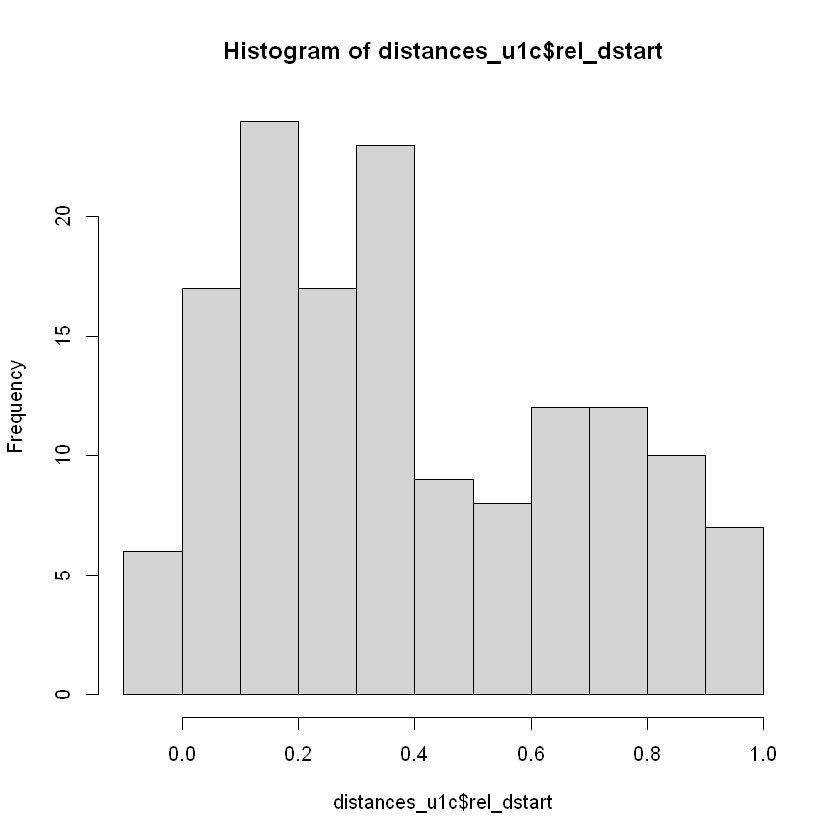

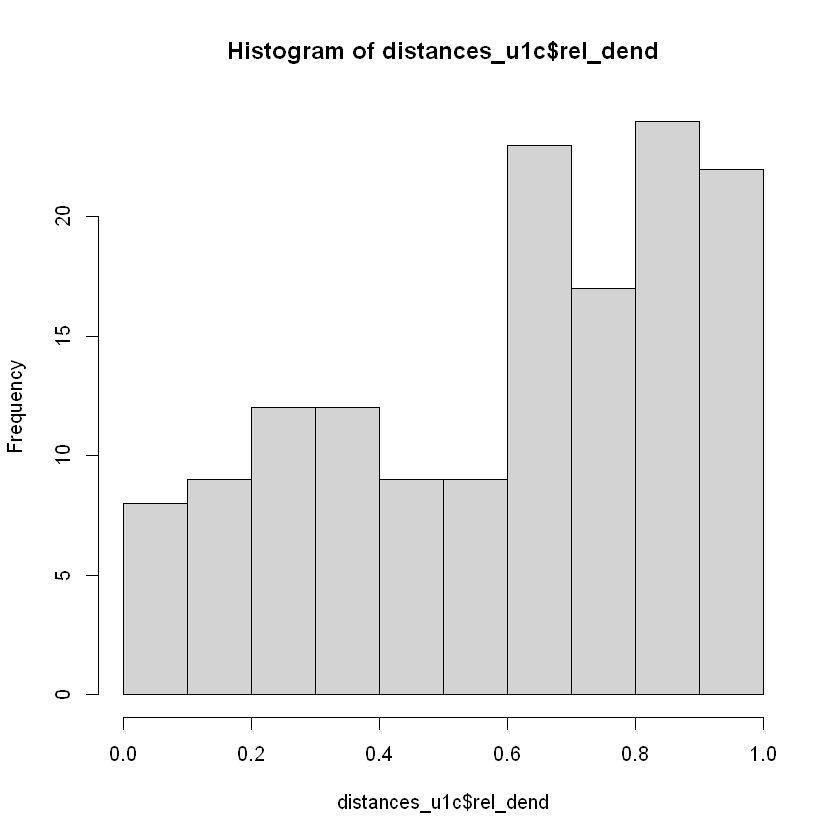

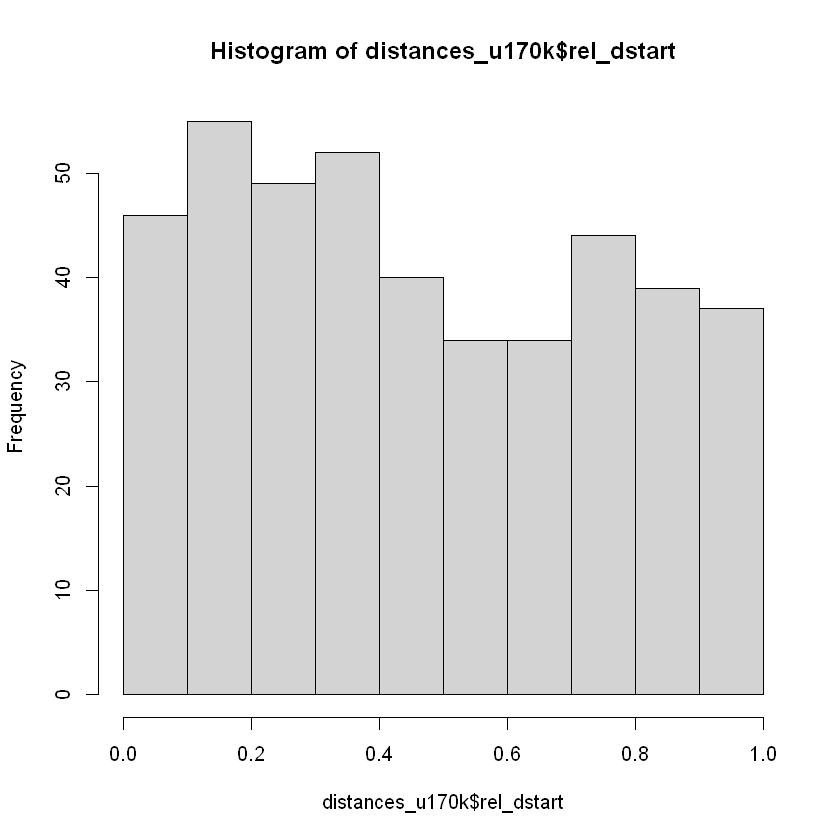

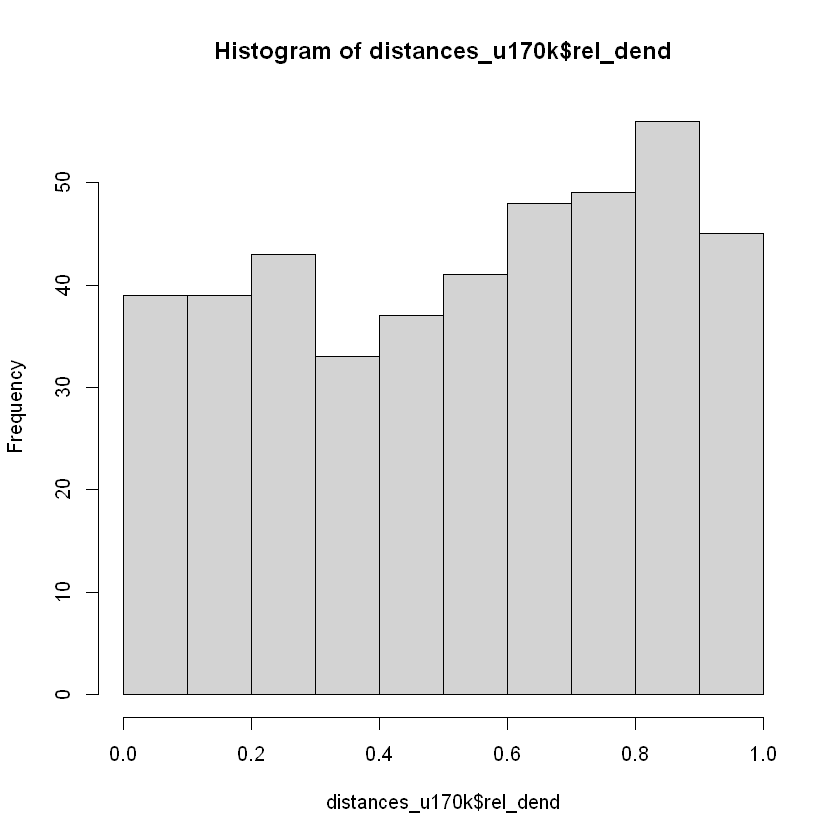

In [7]:
#plot histograms
hist(distances_u1c$rel_dstart)
hist(distances_u1c$rel_dend)
hist(distances_u170k$rel_dstart)
hist(distances_u170k$rel_dend)

In [8]:
#get exact mean and median
summary(distances_u1c)
summary(distances_u170k)

       V1             V3                  V4                 V5          
 Min.   :1.000   Length:145         Min.   :  146179   Min.   :  146831  
 1st Qu.:1.000   Class :character   1st Qu.: 4140457   1st Qu.: 4141071  
 Median :3.000   Mode  :character   Median :10266292   Median :10266783  
 Mean   :2.924                      Mean   :12030252   Mean   :12030745  
 3rd Qu.:4.000                      3rd Qu.:19192536   3rd Qu.:19193464  
 Max.   :5.000                      Max.   :29447706   Max.   :29448129  
      V6                 V7                V10                 V22          
 Length:145         Length:145         Length:145         Min.   :  146285  
 Class :character   Class :character   Class :character   1st Qu.: 4140651  
 Mode  :character   Mode  :character   Mode  :character   Median :10266686  
                                                          Mean   :12030465  
                                                          3rd Qu.:19192659  
                    

       V1             V3                  V4                 V5          
 Min.   :1.000   Length:430         Min.   :   46146   Min.   :   46372  
 1st Qu.:2.000   Class :character   1st Qu.: 5524743   1st Qu.: 5524823  
 Median :3.000   Mode  :character   Median :12049486   Median :12049836  
 Mean   :3.016                      Mean   :12761945   Mean   :12762354  
 3rd Qu.:5.000                      3rd Qu.:19611960   3rd Qu.:19612308  
 Max.   :5.000                      Max.   :30141763   Max.   :30141902  
      V6                 V7                V10                 V22          
 Length:430         Length:430         Length:430         Min.   :   46309  
 Class :character   Class :character   Class :character   1st Qu.: 5524811  
 Mode  :character   Mode  :character   Mode  :character   Median :12049562  
                                                          Mean   :12762130  
                                                          3rd Qu.:19612134  
                    

In [13]:
#now take intron gtf and create new bedfile at the position

atrtd3_gtf_introns = read.table("results/atRTD3_TS_21Feb22_transfix_introns.gtf")        %>% 
                     filter(V3 == "intron")                                                   %>%
                     select(V1, V4, V5, V10, V6, V7)                                          %>%
                     distinct(.keep_all =  T)                                                 %>%
                     mutate(newstart = NA, newend = NA)
                 

for(i in 1:nrow(atrtd3_gtf_introns)){
  if(atrtd3_gtf_introns[i, "V7"] == "+"){
    atrtd3_gtf_introns[i, "newstart"] = round(abs(atrtd3_gtf_introns[i, "V5"] - atrtd3_gtf_introns[i, "V4"])*((0.33803+0.4420)/2) + atrtd3_gtf_introns[i, "V4"])
    atrtd3_gtf_introns[i, "newend"]   = atrtd3_gtf_introns[i, "newstart"] + 1
  }
  
  if(atrtd3_gtf_introns[i, "V7"] == "-"){
    atrtd3_gtf_introns[i, "newend"] = atrtd3_gtf_introns[i, "V5"] - round(abs(atrtd3_gtf_introns[i, "V5"] - atrtd3_gtf_introns[i, "V4"])*((0.33803+0.4420)/2)) 
    atrtd3_gtf_introns[i, "newstart"]   = atrtd3_gtf_introns[i, "newend"] - 1
  }
  
}

In [14]:
#combine and write to bed file
bed_position_within_first_third_of_all_introns          = atrtd3_gtf_introns %>% select(V1, newstart, newend, V10, V6, V7)
bed_position_within_first_third_of_all_introns$newstart = format(bed_position_within_first_third_of_all_introns$newstart, scientific = F)
bed_position_within_first_third_of_all_introns$newend   = format(bed_position_within_first_third_of_all_introns$newend, scientific = F)

write.table(bed_position_within_first_third_of_all_introns, "bed_position_at_onethird_of_all_introns.bed", quote = F, col.names = F, row.names = F, sep = "\t")

In [18]:
#i also just want a bed file with all introns to use for background in motif discovery

atrtd3_gtf_introns = read.table("results/atRTD3_TS_21Feb22_transfix_introns.gtf")  %>% 
                     filter(V3 == "intron")                                        %>%
                     select(V1, V4, V5, V10, V6, V7)                               %>%
                     distinct(.keep_all =  T)



In [19]:
write.table(atrtd3_gtf_introns, "bed_all_introns_atrtd3.bed", quote = F, col.names = F, row.names = F, sep = "\t")

In [ ]:
#now I want to also extract alle the "canonical polyA sites" - or better: The ones that get used by the WT. So if a pA event is classified as enhanced, i want to extract the proximal position
#if it is classified as repressed, i want to extract the distal PAS
#i want to get the corresponding WT site for each significantly differently used pA site.


#filter proximal repressed composite sites
u1c_proximal_pa_repressed_composite_wt_site     = u1c_repressed_composite   %>% select(chr, distal_pos, proximal_pos, gene_id, gene_class, strand) %>% mutate(proximal_pos = distal_pos+1, gene_class = ".")
u170k_proximal_pa_repressed_composite_wt_site   = u170k_repressed_composite %>% select(chr, distal_pos, proximal_pos, gene_id, gene_class, strand) %>% mutate(proximal_pos = distal_pos+1, gene_class = ".")

In [14]:
#distal sites corresponding to the composite repressed proximal sites 
bed_distal_sites_where_u170k_comp_rep_pos = u170k_repressed_composite                %>%
    select(chr, distal_pos, proximal_pos,  gene_id, gene_class, strand) %>% 
    filter(strand == "+")                                               %>%
    group_by(gene_id)                                                   %>%

    #here i make sure i dont take several pAs from the same gene but take the most proximal one
    slice_min(order_by = distal_pos, n = 1)                             %>%
    mutate(proximal_pos = distal_pos+1, gene_class = ".")


bed_distal_sites_where_u170k_comp_rep_neg = u170k_repressed_composite                %>%
    select(chr, proximal_pos, distal_pos,  gene_id, gene_class, strand)     %>%
    filter(strand == "-")                                               %>%
    group_by(gene_id)                                                   %>%  

    #here i make sure i dont take several pAs from the same gene but take the most proximal one
    slice_max(order_by = distal_pos, n = 1)                             %>%
    mutate(proximal_pos = distal_pos-1, gene_class = ".")

colnames(bed_distal_sites_where_u170k_comp_rep_neg) = colnames(bed_distal_sites_where_u170k_comp_rep_pos)
bed_distal_sites_where_u170k_comp_rep = rbind(bed_distal_sites_where_u170k_comp_rep_neg, bed_distal_sites_where_u170k_comp_rep_pos)

In [13]:
#distal sites corresponding to the composite repressed proximal sites 
bed_distal_sites_where_u1c_comp_rep_pos = u1c_repressed_composite       %>%
    select(chr, distal_pos, proximal_pos,  gene_id, gene_class, strand) %>% 
    filter(strand == "+")                                               %>%
    group_by(gene_id)                                                   %>%

    #here i make sure i dont take several pAs from the same gene but take the most proximal one
    slice_min(order_by = distal_pos, n = 1)                             %>%
    mutate(proximal_pos = distal_pos+1, gene_class = ".")


bed_distal_sites_where_u1c_comp_rep_neg = u1c_repressed_composite       %>%
    select(chr, proximal_pos, distal_pos,  gene_id, gene_class, strand) %>%
    filter(strand == "-")                                               %>%
    group_by(gene_id)                                                   %>%  

    #here i make sure i dont take several pAs from the same gene but take the most proximal one
    slice_max(order_by = distal_pos, n = 1)                             %>%
    mutate(proximal_pos = distal_pos-1, gene_class = ".")

colnames(bed_distal_sites_where_u1c_comp_rep_neg) = colnames(bed_distal_sites_where_u1c_comp_rep_pos)
bed_distal_sites_where_u1c_comp_rep = rbind(bed_distal_sites_where_u1c_comp_rep_neg, bed_distal_sites_where_u1c_comp_rep_pos)

In [15]:
write.table(bed_distal_sites_where_u1c_comp_rep,     file = "distal_pA_where_comp_rep_u1c.bed",      quote = F, row.names = F, col.names = F, sep = "\t")
write.table(bed_distal_sites_where_u170k_comp_rep,   file = "distal_pA_where_comp_rep_u170k.bed",    quote = F, row.names = F, col.names = F, sep = "\t")

In [4]:
#now get one bed file with overlap of the strongest pA sites in WT as a reference for cannonical pA sites


ns_distal = all_events %>% filter((proximal_control_sum.x < distal_control_sum.x | proximal_control_sum.y < distal_control_sum.y) & ((gene_class.x == "control_up" | gene_class.x == "control_down") & (gene_class.y == "control_up" | gene_class.y == "control_down"))) 
ns_proximal = all_events %>% filter((proximal_control_sum.x > distal_control_sum.x | proximal_control_sum.y > distal_control_sum.y) & ((gene_class.x == "control_up" | gene_class.x == "control_down") & (gene_class.y == "control_up" | gene_class.y == "control_down"))) 




bed_ns_distal_pos = ns_distal                                           %>%
    select(chr, distal_pos, proximal_pos,  gene_id, gene_name, strand)  %>%
    filter(strand == "+")                                               %>%
    mutate(proximal_pos = distal_pos+1, gene_name = ".")


bed_ns_distal_pos_neg = ns_distal                                     %>%
    select(chr, proximal_pos, distal_pos,  gene_id, gene_name, strand) %>%
    filter(strand == "-")                                               %>%
    mutate(proximal_pos = distal_pos-1, gene_name = ".")

colnames(bed_ns_distal_pos_neg) = colnames(bed_ns_distal_pos)
bed_ns_distal = rbind(bed_ns_distal_pos_neg, bed_ns_distal_pos)





bed_ns_proximal_pos = ns_proximal                                     %>%
    select(chr, proximal_pos, distal_pos,  gene_id, gene_name, strand) %>%
    filter(strand == "+")                                               %>%
    mutate(distal_pos = proximal_pos+1, gene_name = ".")


bed_ns_proximal_pos_neg = ns_proximal                                 %>%
    select(chr, distal_pos, proximal_pos, gene_id, gene_name, strand)  %>%
    filter(strand == "-")                                               %>%
    mutate(distal_pos = proximal_pos-1, gene_name = ".")

colnames(bed_ns_proximal_pos_neg) = colnames(bed_ns_proximal_pos)
bed_ns_proximal = rbind(bed_ns_proximal_pos_neg, bed_ns_proximal_pos)

bed_ns = rbind(bed_ns_distal, bed_ns_proximal)


In [5]:
write.table(bed_ns,     file = "non_affected_WT_consensus_pA_sites.bed",      quote = F, row.names = F, col.names = F, sep = "\t")
summary(bed_ns)

      chr          distal_pos        proximal_pos        gene_id         
 Min.   :1.000   Min.   :   13126   Min.   :   13127   Length:1765       
 1st Qu.:1.000   1st Qu.: 6063032   1st Qu.: 6063031   Class :character  
 Median :3.000   Median :11381561   Median :11381562   Mode  :character  
 Mean   :2.958   Mean   :12627960   Mean   :12627960                     
 3rd Qu.:4.000   3rd Qu.:18867012   3rd Qu.:18867013                     
 Max.   :5.000   Max.   :30412147   Max.   :30412148                     
  gene_name            strand         
 Length:1765        Length:1765       
 Class :character   Class :character  
 Mode  :character   Mode  :character  
                                      
                                      
                                      

In [15]:
sessionInfo()

R version 4.2.2 (2022-10-31 ucrt)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 22631)

Matrix products: default

locale:
[1] LC_COLLATE=English_Germany.utf8  LC_CTYPE=English_Germany.utf8   
[3] LC_MONETARY=English_Germany.utf8 LC_NUMERIC=C                    
[5] LC_TIME=English_Germany.utf8    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] dplyr_1.1.4

loaded via a namespace (and not attached):
 [1] magrittr_2.0.3   tidyselect_1.2.0 uuid_1.2-0       R6_2.5.1        
 [5] rlang_1.1.2      fastmap_1.1.1    fansi_1.0.6      tools_4.2.2     
 [9] utf8_1.2.4       cli_3.6.2        withr_2.5.2      htmltools_0.5.7 
[13] digest_0.6.34    tibble_3.2.1     lifecycle_1.0.4  crayon_1.5.2    
[17] IRdisplay_1.1    repr_1.1.6       base64enc_0.1-3  vctrs_0.6.5     
[21] IRkernel_1.3.2   glue_1.6.2       evaluate_0.23    pbdZMQ_0.3-10   
[25] compiler_4.2.2   pillar_1.9.0     generi